# Yelp Data Challenge - NLP

BitTiger DS501

Jun 2017

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('last_2_years_restaurant_reviews_from_else.csv')

In [4]:
df.shape

(437640, 12)

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

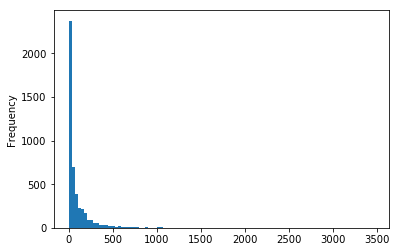

In [6]:
df['business_id'].value_counts().plot.hist(bins=100)

### Define your feature variables, here is the text of the review

In [7]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents=df['text'].values
type(documents)

numpy.ndarray

In [34]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
documents.dtype,documents.shape


(dtype('O'), (437640L,))

In [44]:
documents[2]

"One word my friends: tableside!!! Yes, tableside carving of your steak chateaubriand for two/Creekstone farm steaks never disappoints. One of the best dinners I had this year for sure.  I would recommend Delmonico restaurant in Vegas who ever goes to Vegas or lives there.  \n\nDelmonico is settled within the Venetian hotel and with a 5 pm dinner reservation , they were pretty busy by 6 pm. I'm assuming people want to eat good streak before different shows and other entertainment in Vegas. Service was impeccable with the server and assistant both working harmoniously together.  The restaurant is not overly pretentious or glamorous looking.  I liked the overall atmosphere with the white walls/crisp white tablecloths on the tables with dim lighting.  \n\nThe service starts with the complimentary brioche bread and butter which were decadently heavenly.  Then they entice and educate you about their wine list etc but I don't drink so I was ready to order some steak, steak, steak! I did the 

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [8]:
# Make a column and take the values, save to a variable named "target"
df['target']=(df['avg_stars']>4)
target=df['target'].values

In [9]:
type(target), target.shape

(numpy.ndarray, (437640L,))

#### You may want to look at the statistic of the target variable

In [9]:
# To be implemented
target.mean(), target.std()

(0.21969883922858971, 0.41404258146982909)

## Let's create training dataset and test dataset

In [10]:
from sklearn.cross_validation import train_test_split

C:\Users\Lei Lei\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# Documents is your X, target is your y
# Now split the data to training set and test set

In [11]:
# Split to documents_train, documents_test, target_train, target_test
document_train, document_test, target_train, target_test=train_test_split(
documents,
target,
test_size=0.6,
    random_state=42

)

In [12]:
document_train.shape

(175056L,)

## Let's get NLP representation of the documents

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer=TfidfVectorizer(stop_words='english', max_features=2000)

In [26]:
# Train the model with your training data
x_train=vectorizer.fit_transform(document_train).toarray()


In [16]:
# Get the vocab of your tfidf
words=vectorizer.get_feature_names()
words

[u'00',
 u'10',
 u'100',
 u'11',
 u'12',
 u'13',
 u'14',
 u'15',
 u'16',
 u'17',
 u'18',
 u'19',
 u'1st',
 u'20',
 u'2016',
 u'21',
 u'24',
 u'25',
 u'2nd',
 u'30',
 u'30pm',
 u'35',
 u'3rd',
 u'40',
 u'45',
 u'50',
 u'60',
 u'75',
 u'80',
 u'90',
 u'95',
 u'99',
 u'able',
 u'absolute',
 u'absolutely',
 u'accommodate',
 u'accommodating',
 u'actual',
 u'actually',
 u'add',
 u'added',
 u'adding',
 u'addition',
 u'additional',
 u'admit',
 u'adults',
 u'advance',
 u'affordable',
 u'afternoon',
 u'aged',
 u'ago',
 u'agree',
 u'agreed',
 u'ahead',
 u'ahi',
 u'aioli',
 u'air',
 u'airport',
 u'al',
 u'alcohol',
 u'alfredo',
 u'allow',
 u'allowed',
 u'almond',
 u'alright',
 u'amazing',
 u'amazingly',
 u'ambiance',
 u'ambience',
 u'american',
 u'anniversary',
 u'annoyed',
 u'annoying',
 u'answer',
 u'answered',
 u'anymore',
 u'anytime',
 u'anyways',
 u'apart',
 u'apologize',
 u'apologized',
 u'apology',
 u'app',
 u'apparently',
 u'appeared',
 u'appetite',
 u'appetizer',
 u'appetizers',
 u'apple'

In [27]:
x_train.shape

(175056L, 2000L)

In [ ]:
# Use the trained model to transform your test data
x_test=vectorizer.transform(document_test).toarray()


## Similar review search engine

In [29]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order
  
    


def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]


In [30]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# Draw an arbitrary review from test (unseen in training) documents
random_number=13
search_query=document_test[random_number]
search_queries=[search_query]
print search_query
print search_queries

This place is a gem. So many reasons for me to come back here!

Here are the delicious items that I sampled last night:

Truffle bone marrow 
Uni bites
Fried rice
Salmon belly ceviche
Banana harumaki
Iced green tea

The bone marrow was such a treat and the truffle oil complimented it very nicely. It was also very nice of them to throw an extra bone in because it normally comes with two and the batch they had were too small. The salmon belly ceviche was so fresh tasting. Salmon can get a very fishy smell or taste and it absolutely did not have any of that. The fried rice was delicious and I really dug their special fried rice that has a combo of all three meats, in case you cannot choose just one! The banana harumaki was just amazing. Warm and gooey banana on the inside with the hint of heat from the dusted cayenne pepper. 

The chef even checked on us and asked us if we wanted some extra wonton chips for our dish. You can tell that he has a try passion for the restaurant business. This

In [34]:
# Transform the drawn review(s) to vector(s)
vector_search_queries=vectorizer.transform(search_queries).toarray()

In [35]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_score=cosine_similarity(vector_search_queries,x_train)

MemoryError: 

In [ ]:
similarity_score.shape

In [ ]:
# Let's find top 5 similar reviews
n = 5
pass

In [ ]:
print 'Our search query:'
print  # To be added

In [ ]:
print 'Most %s similar reviews:' % n
print  # To be added

#### Q: Does the result make sense to you?

A: (insert your comments here)

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [ ]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set
pass

#### Logistic Regression Classifier

In [ ]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set
pass

#### Q: What are the key features(words) that make the positive prediction?

In [ ]:
# Let's find it out by ranking
n = 20
pass

A: (insert your comments here)

#### Q: What are the key features(words) that make the negative prediction?

In [ ]:
# Let's find it out by ranking
n = 20
pass

A: (insert your comments here)

#### Random Forest Classifier

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set
pass

#### Q: What do you see from the training score and the test score?

A: (insert your comments here)

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [ ]:
n = 20
pass

## Extra Credit #1: Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
# To be implemented
pass

## Extra Credit #2: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [ ]:
# To be implemented
pass